Setup

In [85]:
# Import necessary modules
import numpy as np                  # NumPy math library
import matplotlib.pyplot as plt     # Matplotlib plotting library

from keras.datasets import mnist    # MNIST dataset
from keras import Sequential        # Sequential model (MLP model) to be used to build our model
from keras.layers import Dense      # Types of layers to be used in our model
from keras.utils import np_utils    # NumPy related tools

Prepare the data

In [86]:
# The MNIST dataset is split into 60,000 28 x 28 pixel images (training) and 10,000 28 x 28 pixel images (testing),
# where each image is a 28 x 28 grayscale image, and 
# each pixel value ranges from 0 (black background) to 255 (white foreground).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show the shapes/dimensions of the dataset of training images and its class vector
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

# Show the shapes/dimensions of the dataset of testing images and its class vector
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


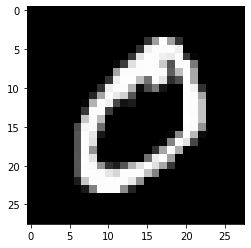

In [87]:
# Show one input (28 x 28 grayscale) image in the training dataset
plt.figure()
plt.imshow(x_train[1], cmap='gray', interpolation='none')
plt.show()

In [88]:
# Show the actual values in the 28 x 28 matrix of the input image
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in x_train[1]]))

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0

In [89]:
# Reshape 60,000 28 x 28 matrices (training images) into 60,000 784-length vectors,
# i.e., each input image is treated as a 784-length vector.
x_train = x_train.reshape(60000, 784)
# Reshape 10,000 28 x 28 matrices (testing images) into 10,000 784-length vectors
x_test = x_test.reshape(10000, 784)

# Scale every pixel to the [0, 1] range 
x_train = x_train.astype('float32') / 255   
x_test = x_test.astype('float32') / 255

# Show the shapes/dimensions of the dataset of converted training images
print("Shape of x_train (updated): ", x_train.shape)
# Show the shapes/dimensions of the dataset of converted testing images
print("Shape of x_test (updated): ", x_test.shape)

Shape of x_train (updated):  (60000, 784)
Shape of x_test (updated):  (10000, 784)


In [90]:
# Number of unique digits
num_classes = 10 

# Convert the training class vector to a binary class matrix, e.g., digit 7 -> [0 0 0 0 0 0 0 1 0 0]
y_train_binary = np_utils.to_categorical(y_train, num_classes)
# Convert the testing class vector to a binary class matrix
y_test_binary = np_utils.to_categorical(y_test, num_classes)

# Show the shape/dimension of each binary class matrix, which should be the number of samples in the set x 10.
print("Shape of y_train_binary: ", y_train_binary.shape)
print("Shape of y_test_binary: ", y_test_binary.shape)

Shape of y_train_binary:  (60000, 10)
Shape of y_test_binary:  (10000, 10)


Build the model

In [91]:
# Build a three-layer MLP model, which takes a 784-length vector as input # and 
# consists two hidden layers of 512 nodes and the output layer of ten nodes.
# The Sequential model is a plain stack of layers. Recall that an MLP consists of successive layers. 
model = Sequential(name='MLP')

# The first hidden layer is a fully-connected layer of 512 nodes (artificial neurons) with the ReLU activation function.
# (784,) indicates the shape/dimension of the input vector, which is a one-dimensional array of size 784.
model.add(Dense(512, activation='relu', input_shape=(784,), name='hidden_layer_1'))

# The second hidden layer is also a fully-connected layer of 512 nodes with the ReLU activation function.
model.add(Dense(512, activation='relu', name='hidden_layer_2'))

# The final layer is a fully-connected layer of of ten nodes (clsses) with the softmax activation function.
model.add(Dense(num_classes, activation='softmax', name='output_layer'))

# Summarize the built model
model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 512)               401920    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 512)               262656    
_________________________________________________________________
output_layer (Dense)         (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Train the model

In [92]:
# Use the Adam optimizer for learning
# Mini-batch learning used with five epochs (five passes over the training dataset)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_binary, batch_size=128, epochs=5)
score = model.evaluate(x_test, y_test_binary)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4075 - accuracy: 0.8829
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0824 - accuracy: 0.9756
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0520 - accuracy: 0.9841
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0325 - accuracy: 0.9896
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9797


Evaluate the trained model

In [93]:
# Show the performance of the learned model
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06812853366136551
Test accuracy: 0.9797000288963318


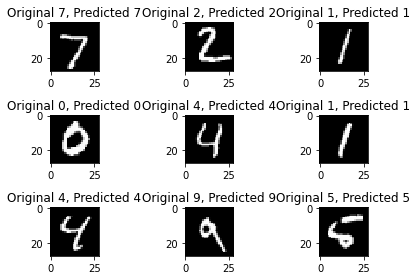

In [94]:
# For each input sample (handwritten digit), its predicted class will be the one with the highest probability 
# according to the trained model.
predicted_classes = np.argmax(model.predict(x_test), axis=-1)

# Check which samples are correctly predicted
correct_samples = np.nonzero(predicted_classes == y_test)[0]

# Show nine samples that are correctly predicted
plt.figure()
for i, correct in enumerate(correct_samples[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Original {}, Predicted {}".format(y_test[correct], predicted_classes[correct]))

plt.tight_layout()
plt.show()

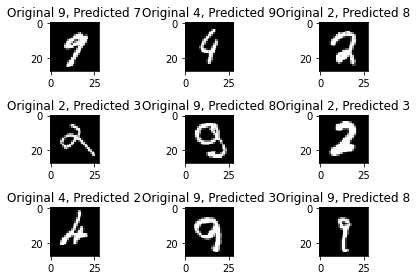

In [95]:
# Check which samples are incorrectly predicted
incorrect_samples = np.nonzero(predicted_classes != y_test)[0]

# Show nine samples that are incorrectly predicted
plt.figure()
for i, incorrect in enumerate(incorrect_samples[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Original {}, Predicted {}".format(y_test[incorrect], predicted_classes[incorrect]))

plt.tight_layout()
plt.show()